In [2]:
import pandas as pd
import numpy as np

In [3]:
origin = "/home/thiemcun/"
file_full_name_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/name_full.csv"
df = pd.read_csv(file_full_name_path) # full name

In [4]:
df_unique = df.drop_duplicates()
df_unique

,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1
...,...,...
26844,Phạm Thị Cẩm Vân,0
26845,Nông Thị Huyền,0
26846,Đoàn Thị Bảo Thu,0
26847,Ôn Hoa Thu,1


In [53]:
full_name = df_unique["Full_Name"]
word_lst= []
for fname in full_name:
  word_lst+=fname.lower().split(" ")

['ngô', 'xuân', 'tùng', 'bùi', 'dương', 'thảo', 'vy', 'lưu', 'thế', 'huy']

In [7]:
word_freq = dict()
for word in word_lst:
  if word not in word_freq:
    word_freq[word] = 1
  else:
    word_freq[word]+=1
word_freq["nguyễn"]

5638

In [28]:
res_word_freq = dict() #reverse frequency
total_unique = sum(word_freq.values())
print("total_unique",total_unique)
for word in word_freq:
  res_word_freq[word] = total_unique / word_freq[word]
res_word_freq["nguyễn"]

total_unique 71392


12.662646328485279

In [68]:
limit = 5
outliers = dict()
for word in res_word_freq:
  if res_word_freq[word] >= total_unique / limit:
    outliers[word] = res_word_freq[word]
print(len(outliers))
lst =list(outliers.items())
lst.sort( key = lambda x: x[1], reverse = True)
print(lst[:10])

1045
[('khảo', 71392.0), ('sec', 71392.0), ('váy', 71392.0), ('dzoãn', 71392.0), ('đơn', 71392.0), ('so', 71392.0), ('phạmxích', 71392.0), ('phisron', 71392.0), ('hồvăn', 71392.0), ('đèo', 71392.0)]


In [69]:
processed_data = dict()
for word in res_word_freq:
  if res_word_freq[word] < total_unique / limit:
    processed_data[word] = res_word_freq[word]
print(len(processed_data))
lst =list(processed_data.items())
lst.sort( key = lambda x: x[1])
print(lst[:10])

498
[('nguyễn', 12.662646328485279), ('thị', 13.774262010418676), ('trần', 30.199661590524535), ('lê', 30.85220397579948), ('ngọc', 41.53112274578243), ('phạm', 51.36115107913669), ('minh', 52.034985422740526), ('hoàng', 53.23788217747949), ('văn', 55.47163947163947), ('thanh', 56.39178515007899)]


## Visualize outliers (lowest is bigest)

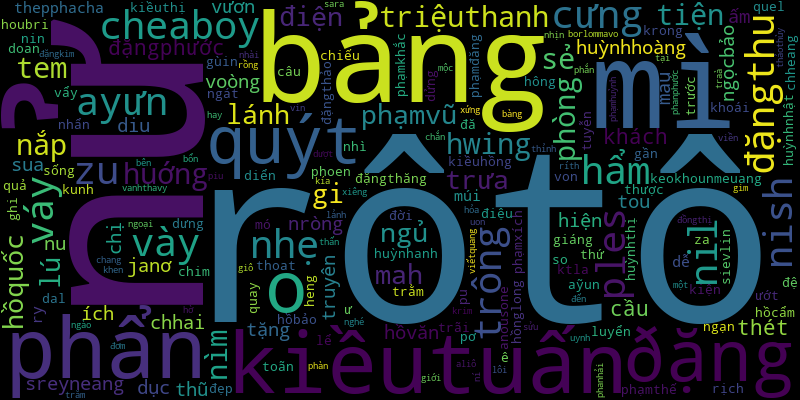

In [70]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 800
image_height = 400
# Generate word cloud

shuffled_items = list(outliers.items())
random.shuffle(shuffled_items)

# Create a new dictionary from the shuffled items
shuffled_word_freq = dict(shuffled_items)
word_cloud = WordCloud(width=image_width, height=image_height).generate_from_frequencies(shuffled_word_freq)


# Generate the image
image = word_cloud.to_image()

# Show the image
image.show()


## Visualize all low frequency words ordered by asc (lowest is bigest)

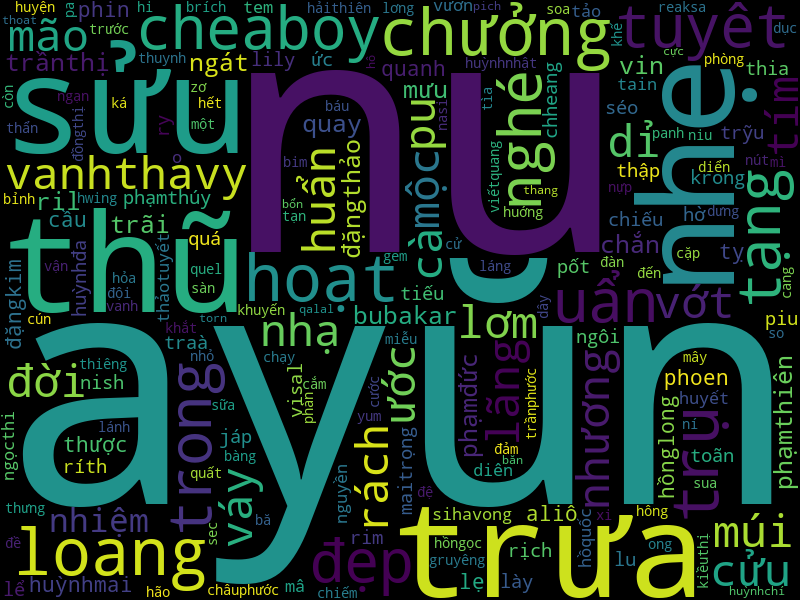

In [23]:
from wordcloud import WordCloud
import random
from PIL import Image
image_width = 800
image_height = 600

# Generate word cloud

shuffled_items = list(res_word_freq.items())
random.shuffle(shuffled_items)

# Create a new dictionary from the shuffled items
shuffled_word_freq = dict(shuffled_items)
word_cloud = WordCloud(width=image_width, height=image_height).generate_from_frequencies(shuffled_word_freq)

# Generate the image
image = word_cloud.to_image()

# Show the image
image.show()


## Processed Data

In [71]:
full_name = df_unique["Full_Name"]
sex = df_unique["Gender"]
outliers_lst = list(outliers.keys())
final_data = {"Full_Name":[],"Gender":[]}
rm = []
for fname, s in zip(full_name,sex):
    a=0
    for word in outliers_lst:
        if word in fname.split(" "):
            a=1
            # break
    if a ==1:
        rm.append(fname)
    if a == 0:
        final_data["Full_Name"].append(fname)
        final_data["Gender"].append(s)
# print(final_data.items())
len(final_data)

2

In [72]:
df = pd.DataFrame(final_data)
file_path = origin + "The-Mr.-or-Ms.-Dilemma-Can-You-Guess-Them-All/GenderPrediction/dataset/processed_full_name.csv"
df.to_csv(file_path,index=False, sep=',')
df.head()


,Full_Name,Gender
0,Ngô Xuân Tùng,1
1,Bùi Dương Thảo Vy,0
2,Lưu Thế Huy,1
3,Nguyễn Thị Vân,0
4,Dương Minh Long,1


In [73]:
print(rm)

['Ê ste Konsơ', 'Phan Ngọc ẩn', 'Ư ng Tro ng Nghi a', 'Nguyễn Thị Châu úc', 'Huy nh Kha Siê u', 'Qua ch Thị Thoa', 'Trần Mai Bảo Ngo c', 'Đặng Bảo Tha i', 'Pha Trung Hiê u', 'Ka lôi', 'Phan Tiê Ngo c', 'Nguyễn Thị á Châu', 'Nay hông']
